In [ ]:
#import pylas
import numpy as np
import laspy
import open3d as o3d

import matplotlib.pyplot as plt
import numpy as np
import cv2

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny

from matplotlib import cm

In [ ]:
las.header
las.header.point_format
las.header.point_count
las.vlrs

In [ ]:
list(las.point_format.dimension_names)

In [ ]:
las.classification

In [ ]:
point_data = np.stack([las.X, las.Y, las.Z], axis=0).transpose((1, 0))
point_data.shape

In [ ]:
distanceXperKM = (np.max(point_data[:,0]) - np.min(point_data[:,0]))
distanceXperM = distanceXperKM/1000
distanceXperCM = distanceXperM/100

print("1 x distance per KM: ", distanceXperKM)
print("1 x distance per M: ", distanceXperM)
print("1 x distance per CM: ", distanceXperCM)

print()

distanceYperKM = (np.max(point_data[:,1]) - np.min(point_data[:,1]))
distanceYperM = distanceYperKM/1000
distanceYperCM = distanceYperM/100

print("1 y distance per KM: ", distanceYperKM)
print("1 y distance per M: ", distanceYperM)
print("1 y distance per CM: ", distanceYperCM)

(np.max(point_data[:,2]) - np.min(point_data[:,2]))

In [ ]:
f = open("testFile.txt", "a")
for i in range(point_data.shape[0]):
    f.write(str(point_data[i,0]) + "," + str(point_data[i, 1]) + "," + str(point_data[i, 2]) + "\n")
f.close()

In [ ]:
point_data

In [ ]:
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(point_data)
o3d.visualization.draw_geometries([geom])





In [ ]:
# Seperate the classes from set(list(las.classification))

print(set(list(las.classification)))

buildings = laspy.create(point_format=las.header.point_format, file_version=las.header.version)
buildings.points = las.points[las.classification == 6]
buildings.write('buildings.las')




#two.write('two.las')

In [ ]:
powerlines = laspy.create(point_format=las.header.point_format, file_version=las.header.version)
powerlines.points = las.points[las.classification == 5]

point_data = np.stack([powerlines.X, powerlines.Y, powerlines.Z], axis=0).transpose((1, 0))
print(point_data.shape)


geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(point_data)
o3d.visualization.draw_geometries([geom])

In [ ]:
las = laspy.read(r'/home/frederik/data/denmark/raw/val/PUNKTSKY_00005_1km_6090_507.laz')

powerlines = laspy.create(point_format=las.header.point_format, file_version=las.header.version)
powerlines.points = las.points[las.classification == 14]

point_data_powerlines = np.stack([powerlines.X, powerlines.Y, powerlines.Z], axis=0).transpose((1, 0))
print(point_data_powerlines.shape)

point_data_all = np.stack([las.X, las.Y, las.Z], axis=0).transpose((1, 0))


    
#geom = o3d.geometry.PointCloud()
#geom.points = o3d.utility.Vector3dVector(point_data)
#o3d.visualization.draw_geometries([geom])

In [ ]:
# Create Dictionary
dictio = {}
counter = 0
for coordinate in point_data_all:
    x, y, z = coordinate
    
    #round x and y to the nearest center.
    meter=0.2
    rounded = 100*meter
    
    center_x = np.round(x/rounded)*rounded
    center_y = np.round(y/rounded)*rounded
    
    if (center_x, center_y) in dictio:
        dictio[(center_x, center_y)].append([x, y, z])
    else:
        dictio[(center_x, center_y)] = [[x, y, z]]


        final_coordinates = []
        
for value in dictio.values():
    numpy_arr_value = np.array(value)
    z_values = numpy_arr_value[:,2]

    # Get the heights and difference
    max_height = np.max(z_values)
    min_height = np.min(z_values)
    difference = max_height-min_height
    
    # meters in Z value
    meter = 3
    meter_criterion = meter*100
    
    # Set the minimum height criterion
    minimum_height = min_height+meter_criterion
    
    # check is there are points higher than the specified meters from the ground.
    if difference > meter_criterion:
        
        # For each coord, append if the coord is higher than 4 meters.
        for coord in numpy_arr_value:
            x, y, z = coord
            if z >= minimum_height:
                final_coordinates.append(coord)
                counter += 1
                
final_coordinates = np.array(final_coordinates)

In [ ]:

geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(final_coordinates)
o3d.visualization.draw_geometries([geom])






In [ ]:
final_coordinates.shape[0] - 5863951

In [ ]:
final_coordinates.shape[0] - 5863951

In [ ]:
counter = 0
lst = []
for key in dictio.keys():
    # The list of Z values
    value = dictio[key]
    
    # Get the heights and difference
    max_height = np.max(value)
    min_height = np.min(value)
    difference = max_height-min_height
    
    # 4 meters in Z value
    meter_criterion = 300
    
    # check is there are points higher than 4 meters from the ground
    if difference > meter_criterion:
        x, y = key
        for z_val in value:
            
            minimum_height = min_height+meter_criterion
            if z_val >= minimum_height:
                lst.append([x, y, z_val])
                counter += 1
    if counter % 200 == 0:
        print(counter)

In [ ]:
lst = np.array(lst)

In [ ]:
lst.shape

In [ ]:
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(lst)
o3d.visualization.draw_geometries([geom])

In [ ]:
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(point_data_all)
o3d.visualization.draw_geometries([geom])

In [ ]:
las = laspy.read(r'/home/frederik/data/TestData/meters.las')
point_data = np.stack([las.X, las.Y, las.Z], axis=0).transpose((1, 0))
print(point_data.shape)


geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(point_data)
o3d.visualization.draw_geometries([geom])

In [ ]:
img = cv2.imread('/home/frederik/data/TestData/meters_idw.tif', cv2.IMREAD_UNCHANGED)
plt.imshow(img, cmap='gray')
plt.show()

img = cv2.imread('/home/frederik/data/TestData/meters_min.tif', cv2.IMREAD_UNCHANGED)
plt.imshow(img, cmap='gray')
plt.show()

img = cv2.imread('/home/frederik/data/TestData/meters_max.tif', cv2.IMREAD_UNCHANGED)
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
image = cv2.imread('/home/frederik/data/TestData/meters_max.tif', cv2.IMREAD_UNCHANGED)
image = np.where(image >= 0, image, 0)
image = image/np.max(image)
#image = 1-image

plt.imshow(image, cmap='gray')
plt.show()

# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

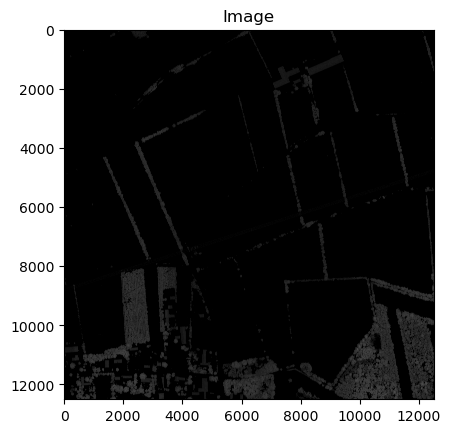

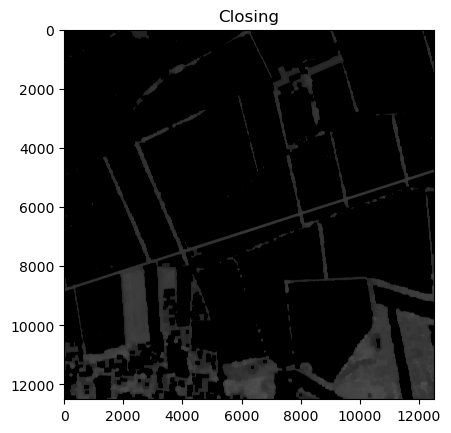

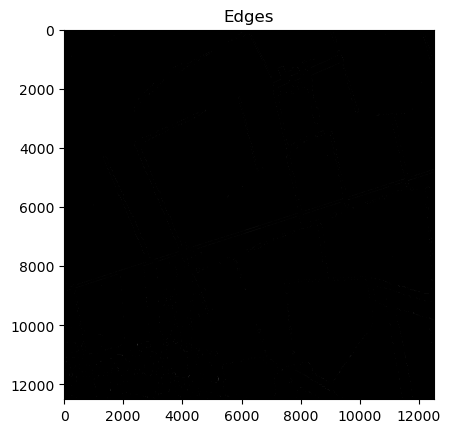

477


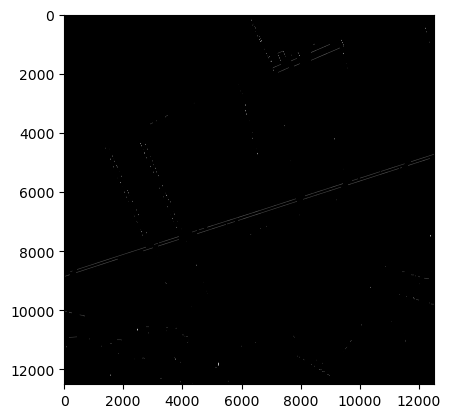

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image = cv2.imread('/home/frederik/data/TestData/meters_max.tif', cv2.IMREAD_UNCHANGED)
image = np.where(image >= 0, image, 0)
image = image/np.max(image)

#image = mpimg.imread("test_images/ppnt.jpg")
image = (image*255).astype(np.uint8)

plt.title("Image")
plt.imshow(image, cmap='gray')
plt.show()


kernel = np.ones((100,100),np.uint8)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.title("Closing")
plt.imshow(closing, cmap='gray')
plt.show()



# Apply edge detection method on the image
#edges = cv2.Canny(image, 50, 200, None, 3)
edges = cv2.Canny(closing, 200, 200, None, 3)

plt.title("Edges")
plt.imshow(edges, cmap='gray')
plt.show()

# Probabilistic Line Transform
# min_line_length, max_line_gap

#dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
#lines: A vector that will store the parameters (r,θ) of the detected lines
#rho : The resolution of the parameter r in pixels. We use 1 pixel.
#theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
#threshold: The minimum number of intersections to "*detect*" a line

#srn For the multi-scale Hough transform, it is a divisor for the distance resolution rho. The coarse accumulator
#distance resolution is rho and the accurate accumulator resolution is rho/srn.
#If both srn=0 and stn=0, the classical Hough transform is used. Otherwise,
#both these parameters should be positive.
# min line length

#stn For the multi-scale Hough transform, it is a divisor for the distance resolution theta.
# max line gap


linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 30, None, 10, 30)

print(len(linesP))

lines_image = np.zeros_like(image)

# Draw the lines
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(lines_image, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3)
        
plt.imshow(lines_image, cmap='gray')
plt.show()

In [ ]:
las = laspy.read(r'/home/frederik/data/TestData/meters.las')
point_data = np.stack([las.X, las.Y, las.Z], axis=0).transpose((1, 0))



In [ ]:
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(point_data)
o3d.visualization.draw_geometries([geom])

In [ ]:


# Create Dictionary
dictio = {}
for i, coordinate in enumerate(point_data):
    x, y, z = coordinate
    #round x and y and z to the nearest center.
    meter = 2
    rounded = 100*meter
    
    center_x = np.round(x/rounded)*rounded
    center_y = np.round(y/rounded)*rounded
    center_z = np.round(z/rounded)*rounded
    
    if (center_x, center_y, center_z) in dictio:
        dictio[(center_x, center_y, center_z)].append([x,y,z])
    else:
        dictio[(center_x, center_y, center_z)] = [[x,y,z]]






In [ ]:
limit = 10
final_array = []
for value in dictio.values():
    if len(value) <= limit:
        final_array += value
        
final_array = np.array(final_array)

In [ ]:
#geom = o3d.geometry.PointCloud()
#geom.points = o3d.utility.Vector3dVector(final_array)
#o3d.visualization.draw_geometries([geom])

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(final_array)
o3d.visualization.draw_geometries([pcd])

In [ ]:
print(point_data.shape)
print(final_array.shape)

In [ ]:
def LoadAndDataProcess(filename):
    with open(filename) as f:
        lines = [line.rstrip('\n') for line in f]
    f.close()
    lst = []
    for i in lines:
        splitted = i.split(',')
        lst.append(splitted[0][8:])
        lst.append(splitted[1][4:])
        lst.append(splitted[2])
        lst.append(splitted[3][:-1])
        lst.append(splitted[4][4:])
        lst.append(splitted[5])
        lst.append(splitted[6][:-1])
    lst = np.array(lst, dtype=float).reshape(-1, 7)
    return lst

# nlines, coordinate a, coordinate b
LoadAndDataProcess("Hough10Lines.txt")